<a href="https://colab.research.google.com/github/Sangram-Rout/me314/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME314 Homework #2
Name: (Double Click to Edit)

Date: 10/6/19

## Imports and Helper Functions
Here you will find all the necessary libraries that we need to import to be able to complete the homework.

In [ ]:
import numpy as np
import sympy as sym
from sympy.abc import t
%matplotlib inline
import matplotlib.pyplot as plt

#######################
# Custom latex printing
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

####################
# Simulation helpers
def integrate(f,x0,dt):
    """
    This function takes in an initial condition x0 and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a vector x at the future time step.
    """
    k1=dt*f(x0)
    k2=dt*f(x0+k1/2.)
    k3=dt*f(x0+k2/2.)
    k4=dt*f(x0+k3)
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    return xnew

def simulate(f,x0,tspan,dt):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj   

## Problem Set

You will turn in paper copies of all problems you choose to handwrite, and turn in an ***editable*** link to your *Colaboratory* notebook online. You may use Python to complete or help with anything on the homework, but whatever you turn in on paper must clearly demonstrate what your approach is, where Python was used, and what calculations you are doing. After this homework we will be asking you to work more exclusively with Python to do problems and algebraic manipulations, so you should be actively trying to get comfortable with it in this homework.

In [ ]:
#@title
# Code to display images
from IPython.core.display import HTML
display(HTML("<table><tr><td><img src='https://github.com/tberrueta/ME314pngs/raw/master/dynbeadwire.png' width=500' height='350'></td><td><img src='https://github.com/tberrueta/ME314pngs/raw/master/twolinearmasses.png' width='350' height='350'></td></tr></table>"))

,


Figure 1: (left) bead on a wire (right) two masses on a line.

----------------------------------------------

### Problem #1 (10 pts)
Let $f:\mathbb{R}^2\to\mathbb{R}$ with $f(x,y)=-\cos(x+y)\cos(x-y)$.  Show that $(x,y)=(0,0)$ satisfies both the necessary *and* sufficient conditions to be a local minimizer of $f$.

In [ ]:
# Here we define the constants/variables relevant to the problem
#SKR attempt to create lagrangian
m,M,R,g,L,k1,k2 = sym.symbols('m M R g L k1 k2')
x = sym.Function(r'x')(t)
y = sym.Function(r'y')(t)
f=-1*(sym.cos(x+y))*(sym.cos(x-y))
fdotx = f.diff(x)
fdoty = f.diff(y)
fddotxy=fdotx.diff(y) 
fddotyx=fdoty.diff(x) 
fddotxx=fdotx.diff(x) 
fddotyy=fdoty.diff(y)
#display(fddotyy({x:0,y:0}))
D=fddotxx*fddotyy-2*fddotxy

NameError: ignored

In [ ]:

vec_fun1 = fdotx.subs({x:0,y:0})
display(vec_fun1)
vec_fun2 = fdoty.subs({x:0,y:0})
display(vec_fun2)
vec_fun3 = D.subs({x:0,y:0})
display(vec_fun3)


NameError: ignored

Let f be a function with two variables with continuous second order partial derivatives f xx , f yy and f xy at a critical point (a,b). Let
D = fxx(a,b) fyy(a,b) - fxy2(a,b)
a) If D > 0 and f xx (a,b) > 0, then f has a relative minimum at (a,b).
b) If D > 0 and f xx (a,b) < 0, then f has a relative maximum at (a,b).
c) If D < 0, then f has a saddle point at (a,b).
d) If D = 0, then no conclusion can be drawn. 
The above solution satifies the conditions for local minimizer

### Problem #2 (10 pts)
Compute the ODE and the constraint force for a bead in gravity constrained to the path $y=\cos(x)$ seen in Fig. 1(left). Gravity is in the negative $y$ direction.

let theta1:x and theta2:y

In [ ]:
# Here we define the constants/variables relevant to the problem
#SKR attempt to create lagrangian
m,M,R,g,l,k1,k2,h,  = sym.symbols('m M R g l k1 k2 h')

#th1dot=th1.diff(t)
# Here we define the constants/variables relevant to the problem
#SKR attempt to create lagrangian
m,M,R,g,l,k1,k2,y   = sym.symbols('m M R g l k1 k2  y')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
phi = sym.Function(r'\phi')(t)
zeta = sym.Function(r'\zeta')(t)
#x, xd, vdd = sym.symbols('x \dot{x} \ddot{x}') 
#y, yd, vdd = sym.symbols('y \dot{y} \ddot{y}') 
#y = sym.symbols('y ')# dummy variables
th1dot=th1.diff(t)
# Here we define our configuration variables
q = sym.Matrix([th1,th2])
qdot = q.diff(t)
#th1d=qdot[0]
#th2d=qdot[1]
qddot = qdot.diff(t)
#x1=l*(sym.tan(th1))
#x1dot=x1.diff(t)


#define phi as the function
phi=th2-sym.cos(th1)


#q = sym.Matrix([x,y])
#qdot = q.diff(t)
#qddot = qdot.diff(t)

x2=l*((sym.tan(th1+th2))-(sym.tan(th1)))
x2dot=x2.diff(t)

U=m*g*th2
K=0.5*m*((qdot[0])*(qdot[0])+(qdot[1])*(qdot[1]))

L=K-U
#Define del operator
dphdel = sym.Matrix([phi]).jacobian(q).T

#Define EL Equations
dLdq1 = sym.Matrix([L]).jacobian(q).T
ddLdqdot_dt1 = sym.Matrix([L]).jacobian(qdot).T.diff(t)
EulerLagrangeEQs1 = sym.Eq(ddLdqdot_dt1-dLdq1, zeta*dphdel)

#Getting Solutions
EulerSols1 = sym.solve(EulerLagrangeEQs1,[qddot[0],qddot[1]])


#ddLdqdot_dt1 = sym.Matrix([L]).jacobian(qdot).T.diff(t)
#EulerLagrangeEQs1 = sym.Eq(ddLdqdot_dt1-dLdq1, sym.Matrix([0,0]))

#Getting Solutions
#EulerSols1 = sym.solve(EulerLagrangeEQs1,[qddot[0],qddot[1]])

#third equation
phidt = phi.diff(t)
phiddt=phidt.diff(t)
EQs3 = sym.Eq(phiddt, 0)

#LHS=ddLdqdot_dt1-dLdq1
#LHS=LHS.row_insert(2,Matrix([1]))
#ddLdqdot_dt1
#np.r_[LHS,(phiddt)]

EulerSols2 = sym.solve([EulerLagrangeEQs1,EQs3],[qddot[0],qddot[1],zeta])


In [ ]:

display(EulerLagrangeEQs1)
display(EQs3)

⎡           2               ⎤                             
⎢          d                ⎥                             
⎢   1.0⋅m⋅───(\theta₁(t))   ⎥                             
⎢           2               ⎥                             
⎢         dt                ⎥   ⎡\zeta(t)⋅sin(\theta₁(t))⎤
⎢                           ⎥ = ⎢                        ⎥
⎢              2            ⎥   ⎣        \zeta(t)        ⎦
⎢             d             ⎥                             
⎢g⋅m + 1.0⋅m⋅───(\theta₂(t))⎥                             
⎢              2            ⎥                             
⎣            dt             ⎦                             

                  2                                               2     2     
                 d                                ⎛d             ⎞     d      
sin(\theta₁(t))⋅───(\theta₁(t)) + cos(\theta₁(t))⋅⎜──(\theta₁(t))⎟  + ───(\the
                  2                               ⎝dt            ⎠      2     
                dt                                                    dt      

           
           
ta₂(t)) = 0
           
           

In [ ]:
display(EulerSols2)

⎧            ⎛                                    2⎞                   ⎛      
⎪            ⎜                    ⎛d             ⎞ ⎟                   ⎜      
⎪          m⋅⎜g - cos(\theta₁(t))⋅⎜──(\theta₁(t))⎟ ⎟    2              ⎜g - co
⎨            ⎝                    ⎝dt            ⎠ ⎠   d               ⎝      
⎪\zeta(t): ─────────────────────────────────────────, ───(\theta₁(t)): ───────
⎪                       2                               2                     
⎩                    sin (\theta₁(t)) + 1.0           dt                      

                              2⎞                                    ⎛         
              ⎛d             ⎞ ⎟                                    ⎜     2   
s(\theta₁(t))⋅⎜──(\theta₁(t))⎟ ⎟⋅sin(\theta₁(t))    2              -⎜g⋅sin (\t
              ⎝dt            ⎠ ⎠                   d                ⎝         
────────────────────────────────────────────────, ───(\theta₂(t)): ───────────
             2                                     

### Problem #3 (20 pts)
Compute the equations of motion for the system in
  Fig. 1(right) in $\theta=(\theta_1,\theta_2)$ coordinates assuming
  that there is a spring of spring constant $k_1$ between the first
  mass and the wall and a spring of spring constant $k_2$ between the
  first mass and the second mass.

In [ ]:
# Here we define the constants/variables relevant to the problem
#SKR attempt to create lagrangian
m,M,R,g,l,k1,k2 = sym.symbols('m M R g l k1 k2')
th1 = sym.Function(r'\theta_1')(t)
th2 = sym.Function(r'\theta_2')(t)
#th1dot=th1.diff(t)

# Here we define our configuration variables
q = sym.Matrix([th1,th2])
qdot = q.diff(t)
qddot = qdot.diff(t)
x1=l*(sym.tan(th1))
x1dot=x1.diff(t)

#q = sym.Matrix([x,th])
#qdot = q.diff(t)
#qddot = qdot.diff(t)

x2=l*((sym.tan(th1+th2))-(sym.tan(th1)))
x2dot=x2.diff(t)

U=0.5*(k1)*x1*x1+0.5*(k2)*x2*x2
K=0.5*m*((x1dot*x1dot)+(x1dot+x2dot)*(x1dot+x2dot)) # Grader: to square something you can use x**2
L=K-U

# Define EL Equations
dLdq = sym.Matrix([L]).jacobian(q).T
ddLdqdot_dt = sym.Matrix([L]).jacobian(qdot).T.diff(t)
EulerLagrangeEQs = sym.Eq(ddLdqdot_dt-dLdq, sym.Matrix([0,0]))

# Getting Solutions
EulerSols = sym.solve(EulerLagrangeEQs,[qddot[0],qddot[1]])


In [ ]:
display(sym.Eq(qddot[0],EulerSols[qddot[0]]))


                  ⎛                                                           
                  ⎜                                                           
  2               ⎜-k₁⋅tan(\theta₁(t)) + k₂⋅tan(\theta₁(t) + \theta₂(t)) - k₂⋅
 d                ⎝                                                           
───(\theta₁(t)) = ────────────────────────────────────────────────────────────
  2                                                                           
dt                                                                            

                                                         2                    
                           3             ⎛d             ⎞                     
tan(\theta₁(t)) - 2.0⋅m⋅tan (\theta₁(t))⋅⎜──(\theta₁(t))⎟  - 2.0⋅m⋅tan(\theta₁
                                         ⎝dt            ⎠                     
──────────────────────────────────────────────────────────────────────────────
                            m                      

In [ ]:
display(sym.Eq(qddot[1],EulerSols[qddot[1]]))

                                                           ⎛                  
                                                         2 ⎜      2           
  2               (tan(\theta₁(t))⋅tan(\theta₂(t)) - 1.0) ⋅⎜k₁⋅tan (\theta₁(t)
 d                                                         ⎝                  
───(\theta₂(t)) = ────────────────────────────────────────────────────────────
  2                                                                           
dt                                                                            

                                                                              
                                                            3                 
 + \theta₂(t))⋅tan(\theta₁(t)) + k₁⋅tan(\theta₁(t)) - k₂⋅tan (\theta₁(t) + \th
                                                                              
──────────────────────────────────────────────────────────────────────────────
                                                   

### Problem #4 (20 pts)
Show by example that Newton's equations do not hold in an
  arbitrary choice of coordinates using the two masses on a line
  example discussed in class and seen in Fig. 1(right)
  (but they do, of course, hold in Cartesian coordinates). You should
  be able to show this in just a few lines. In other words, show that when the $a$ in $F=ma$ represents the second derivative of a coordinate in a non-inertial frame, Newton's equations of motion don't hold.

in written form

### Problem #5 (20 pts)
Show that torque balance for a rotating body $J \alpha=\sum
  \tau$ (where $\alpha=\ddot{\theta}$ and $J$ is the rotational inertia)
  satisfies a least action principle principle.  Assume that the
  forces are from potentials that depend on the rotation $\theta$ (i.e.,
  $\tau=-\frac{\partial V(\theta)}{\partial\theta}$).  You need to figure out what the kinetic
  energy should be and then show that torque balance is a result of
  extremizing the integral of the kinetic energy minus the potential
  energy.  Hint: this is similar to the second day of lecture when we
  discussed a point mass in gravity.

in written form

### Problem #6 (20 pts)
Simulate the system in Fig. 1(left) with an
  initial condition of $(x,y)=(\pi/2,0)$ and zero velocity with a mass
  of $m=1$ for $t\in[0,10]$.  Plot the resulting $(x,y)$ trajectory as
  (1) $x(t)$ and $y(t)$ versus time and (2) of $x(t)$ versus $y(t)$
  using Matplotlib in *Colaboratory*.

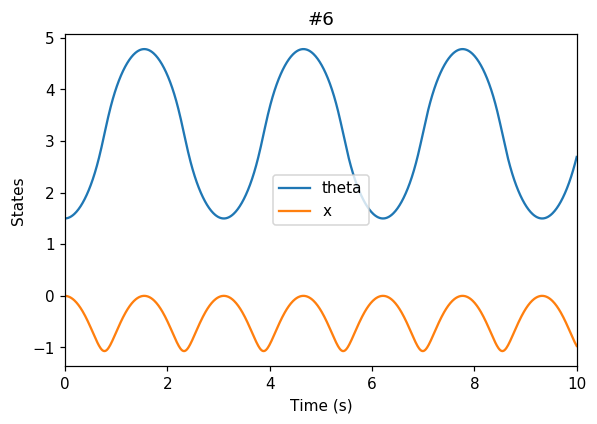

In [ ]:
import numpy as np
import sympy as sym
import math
from sympy.abc import t
%matplotlib inline
import matplotlib.pyplot as plt

#######################
# Custom latex printing
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
sym.init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)

def integrate(f,x0,dt):
    """
    This function takes in an initial condition x0 and a timestep dt,
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a vector x at the future time step.
    """
    k1=dt*f(x0)
    k2=dt*f(x0+k1/2.)
    k3=dt*f(x0+k2/2.)
    k4=dt*f(x0+k3)
    xnew=x0+(1/6.)*(k1+2.*k2+2.*k3+k4)
    return xnew

def simulate(f,x0,tspan,dt):
    """
    This function takes in an initial condition x0, a timestep dt,
    a time span tspan consisting of a list [min_time, max_time],
    as well as a dynamical system f(x) that outputs a vector of the
    same dimension as x0. It outputs a full trajectory simulated
    over the time span of dimensions (xvec_size, time_vec_size).
    """
    N = int((max(tspan)-min(tspan))/dt)
    x = np.copy(x0)
    tvec = np.linspace(min(tspan),max(tspan),N)
    xtraj = np.zeros((len(x0),N))
    for i in range(N):
        xtraj[:,i]=integrate(f,x,dt)
        x = np.copy(xtraj[:,i])
    return xtraj  
  
  
  #####################################
# Here we define our dynamics as a 
# function outputting the xdot vector
def dynamics(q):#q = [thetadot, xdot, theta, x]
  m = 1
  M = 2
  g = 9.8
  l = 1
  thetadot = q[0]
  xdot = q[1]
  theta = q[2]
  x = q[3]
  
  #xDD = (m*l*thetadot*thetadot*math.sin(theta)-m*math.cos(theta)*g*math.sin(theta))/(m*math.cos(theta)*math.cos(theta)-M-m)
  #thetaDD = (g*math.sin(theta)+xDD*math.cos(theta)) #verified
  
  thetaDD =(sym.sin(q[2]))*(g-sym.cos(q[2])*(q[0]**2))/(sym.sin(q[2])**2+1)
  xDD =-1*(g*sym.sin(q[2])**2+sym.cos(q[2]))*(q[0]**2)/(sym.sin(q[2])**2+1)
  
  
  qdot = np.array([
      (np.sin(q[2]))*(g-np.cos(q[2])*(q[0]**2))/(np.sin(q[2])**2+1) , 
      -1*(g*np.sin(q[2])**2+np.cos(q[2])*(q[0]**2))/(np.sin(q[2])**2+1) , 
      q[0], 
      q[1]
  ])
    
    
  #xdot = np.array([-x[0]-x[1],
                     #-np.sin(x[1])])
  return qdot

###################################
# Here we define initial conditions 
# and time variables
tspan = [0,10]
dt = 0.01


q0 = np.array([0,0,1.5,0])


N = int((max(tspan)-min(tspan))/dt)
tvec = np.linspace(min(tspan),max(tspan),N)

##################
# Here we simulate
qvec = simulate(dynamics,q0,tspan,dt) # just one line!
#xvec[1] = (-9.8/2)*tvec*tvec+1
#for i in range(len(xvec[1])):
#  if xvec[1][i] < 0:
#    xvec[1][i] = 0



##############
# Here we plot
plt.figure(dpi=110,facecolor='w')
#plt.plot(tvec,qvec[0])
#plt.plot(tvec,qvec[1])
plt.plot(tvec,qvec[2])
plt.plot(tvec,qvec[3])

plt.xlim(tspan)

plt.title('#6')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.legend(['theta','x','theta(t)','x(t)'])


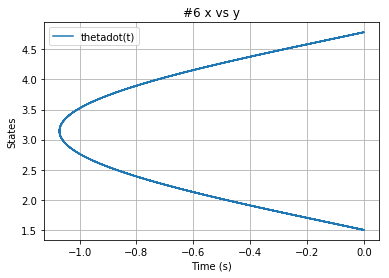

In [ ]:

plt.plot(qvec[3],qvec[2])
plt.title('#6 x vs y')
plt.xlabel('Time (s)')
plt.ylabel('States')
plt.legend(['thetadot(t)','xdot(t)','theta(t)','x(t)'])
plt.grid(True)
plt.show()